___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df_female=pd.read_csv('ANSUR II FEMALE Public.csv',encoding="utf-8")

In [3]:
df_male=pd.read_csv('ANSUR II MALE Public.csv',encoding="utf-8",encoding_errors='ignore')

In [4]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [5]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

## Explore Data

In [6]:
df_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB


In [7]:
df_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB


In [8]:
print(df_female.columns==df_male.columns)

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


In [9]:
df_female.rename(columns={'SubjectId':'subjectid'},inplace=True)

In [10]:
print(df_female.columns==df_male.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


In [11]:
df=pd.concat([df_male,df_female])

In [12]:
df.sample(5).T

,1316,2353,1165,3437,906
subjectid,25717,21756,25341,28066,14023
abdominalextensiondepthsitting,223,195,244,230,318
acromialheight,1316,1465,1279,1620,1464
acromionradialelength,324,349,300,376,376
anklecircumference,206,215,207,245,238
axillaheight,1213,1356,1180,1512,1349
balloffootcircumference,227,247,226,273,270
balloffootlength,179,204,177,216,207
biacromialbreadth,334,405,357,421,442
bicepscircumferenceflexed,292,297,305,352,405


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 1985
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [14]:
df.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [15]:
df.drop(columns='Ethnicity',inplace=True) #there are too much missing data , so we dropped it.

In [16]:
df.isnull().sum().sum() #there are no empty values

0

In [17]:
df.duplicated().sum()

0

In [18]:
df=df.reset_index(drop=True)

In [19]:
df.filter(regex='Race') #Both columns are reporting the same values so I will drop one of them

,SubjectNumericRace,DODRace
0,1,1
1,1,1
2,2,2
3,1,1
4,2,2
...,...,...
6063,3,3
6064,3,3
6065,2,2
6066,3,3


In [20]:
df.drop(columns='SubjectNumericRace',inplace=True)

In [21]:
df.filter(regex='[W,w]eight') #both columns have same information so I will drop one of them

,weightkg,Weightlbs
0,815,180
1,726,160
2,929,205
3,794,175
4,946,213
...,...,...
6063,832,180
6064,717,150
6065,762,168
6066,632,133


In [22]:
df.drop(columns='weightkg',inplace=True)

In [23]:
df.select_dtypes('object')

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,WritingPreference
0,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,Right hand
1,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,Left hand
2,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,Left hand
3,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,Right hand
4,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,Right hand
...,...,...,...,...,...,...,...,...
6063,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,Right hand
6064,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,25U,Texas,Right hand
6065,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,Right hand
6066,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,92Y,Texas,Right hand


###### Date – Date the participant was measured, ranging from “04-Oct-10” to “05-Apr-12”



###### Branch – “Combat Arms”, “Combat Support”, or “Combat Service Support”


###### Component – “Army National Guard”, “Army Reserve”, or “Regular Army”


###### PrimaryMOS – Primary Military Occupational Specialty


###### Installation – U.S. Army installation where the measurement occurred 

#### None of the columns on the upper are necessary, so we will drop them

In [24]:
df.drop(columns=['Date','Branch','Component','PrimaryMOS','Installation','SubjectsBirthLocation','subjectid','WritingPreference'],inplace=True)

In [25]:
df.select_dtypes('object')

,Gender
0,Male
1,Male
2,Male
3,Male
4,Male
...,...
6063,Female
6064,Female
6065,Female
6066,Female


In [26]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})

In [27]:
df['Gender'].value_counts()

1    4082
0    1986
Name: Gender, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 97 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   abdominalextensiondepthsitting  6068 non-null   int64
 1   acromialheight                  6068 non-null   int64
 2   acromionradialelength           6068 non-null   int64
 3   anklecircumference              6068 non-null   int64
 4   axillaheight                    6068 non-null   int64
 5   balloffootcircumference         6068 non-null   int64
 6   balloffootlength                6068 non-null   int64
 7   biacromialbreadth               6068 non-null   int64
 8   bicepscircumferenceflexed       6068 non-null   int64
 9   bicristalbreadth                6068 non-null   int64
 10  bideltoidbreadth                6068 non-null   int64
 11  bimalleolarbreadth              6068 non-null   int64
 12  bitragionchinarc                6068 non-null   int64
 13  bit

In [29]:
df['DODRace'].value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [30]:
df=df[df['DODRace'].isin([1,2,3])]   #we are dropping some rows because there is too little data for  our model  to learn

###### 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian,5 = Native American, 6 = Pacific Islander, 8 = Other

In [31]:
df.reset_index(drop=True,inplace=True)

In [32]:
df['DODRace']=df['DODRace'].map({1:'White',2:'Black',3:'Hispanic'})
##we don't want our model to think there is hierarchy between race so we chanced from number to text.

In [33]:
df['DODRace'].value_counts()

White       3792
Black       1298
Hispanic     679
Name: DODRace, dtype: int64

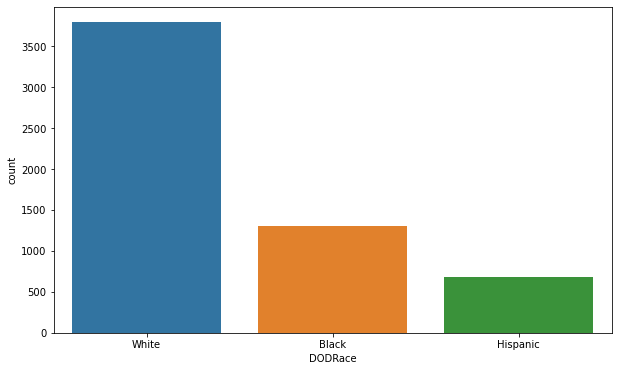

In [34]:
sns.countplot(df['DODRace']);

In [35]:
df_corr=df.corr()
count=0
for col in df_corr.columns:
    for i in df_corr.index:
        if (df_corr[col][i]<1 and df_corr[col][i]>0.90) or (df_corr[col][i]>-1 and df_corr[col][i]<-0.90)  :
            count+=1
            print(count)
            print(col)
            print(i)
            print(df_corr[col][i])
            print('----------')

  

1
abdominalextensiondepthsitting
waistcircumference
0.939644784487141
----------
2
abdominalextensiondepthsitting
waistdepth
0.9587157665171977
----------
3
acromialheight
axillaheight
0.9871153302144362
----------
4
acromialheight
cervicaleheight
0.9839553263985752
----------
5
acromialheight
chestheight
0.9593002724094477
----------
6
acromialheight
iliocristaleheight
0.9322316628697562
----------
7
acromialheight
kneeheightsitting
0.9317616319755508
----------
8
acromialheight
stature
0.9799246704360618
----------
9
acromialheight
suprasternaleheight
0.9847110784008039
----------
10
acromialheight
tenthribheight
0.9450187426923785
----------
11
acromialheight
waistheightomphalion
0.9309542465273224
----------
12
acromialheight
wristheight
0.9212682635885717
----------
13
acromialheight
Heightin
0.9438904388936644
----------
14
acromionradialelength
shoulderelbowlength
0.9674996445254073
----------
15
acromionradialelength
sleeveoutseam
0.9398066873283589
----------
16
axillaheight
a

166
neckcircumference
neckcircumferencebase
0.9694952327813529
----------
167
neckcircumferencebase
neckcircumference
0.9694952327813529
----------
168
poplitealheight
axillaheight
0.9056771567371443
----------
169
poplitealheight
cervicaleheight
0.9066629580659902
----------
170
poplitealheight
chestheight
0.9085084592376919
----------
171
poplitealheight
crotchheight
0.9305257537498234
----------
172
poplitealheight
iliocristaleheight
0.9055747652926902
----------
173
poplitealheight
kneeheightmidpatella
0.9280608187603248
----------
174
poplitealheight
kneeheightsitting
0.9373364354553978
----------
175
poplitealheight
lateralfemoralepicondyleheight
0.9020967863871416
----------
176
poplitealheight
tibialheight
0.9157031584804881
----------
177
poplitealheight
waistheightomphalion
0.9280674582536313
----------
178
radialestylionlength
forearmcenterofgriplength
0.9285179260635317
----------
179
radialestylionlength
forearmhandlength
0.9382292882699482
----------
180
radialestylionlen

In [36]:
df.sample(5).T

,4525,2232,2182,2161,3839
abdominalextensiondepthsitting,273,260,254,192,333
acromialheight,1468,1408,1524,1355,1539
acromionradialelength,358,343,345,316,367
anklecircumference,243,236,230,207,238
axillaheight,1379,1311,1396,1258,1410
balloffootcircumference,256,264,257,229,263
balloffootlength,201,211,218,190,216
biacromialbreadth,391,419,409,374,459
bicepscircumferenceflexed,355,444,337,279,401
bicristalbreadth,284,268,293,261,285


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Data columns (total 97 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  5769 non-null   int64 
 1   acromialheight                  5769 non-null   int64 
 2   acromionradialelength           5769 non-null   int64 
 3   anklecircumference              5769 non-null   int64 
 4   axillaheight                    5769 non-null   int64 
 5   balloffootcircumference         5769 non-null   int64 
 6   balloffootlength                5769 non-null   int64 
 7   biacromialbreadth               5769 non-null   int64 
 8   bicepscircumferenceflexed       5769 non-null   int64 
 9   bicristalbreadth                5769 non-null   int64 
 10  bideltoidbreadth                5769 non-null   int64 
 11  bimalleolarbreadth              5769 non-null   int64 
 12  bitragionchinarc                5769 non-null   

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [38]:
X = df.drop('DODRace',axis=1)
y = df['DODRace']

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, stratify = y)

In [41]:
scaler = StandardScaler()

In [42]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [44]:
log_model = LogisticRegression()

In [45]:
log_model.fit(X_train_scaled,y_train)
y_pred = log_model.predict(X_test_scaled)

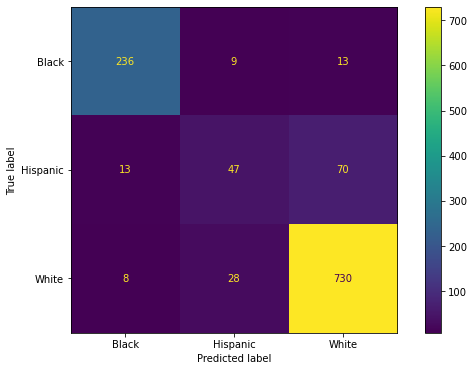

In [46]:
plot_confusion_matrix(log_model, X_test_scaled, y_test)

In [47]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [48]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[236   9  13]
 [ 13  47  70]
 [  8  28 730]]
              precision    recall  f1-score   support

       Black       0.92      0.91      0.92       258
    Hispanic       0.56      0.36      0.44       130
       White       0.90      0.95      0.92       766

    accuracy                           0.88      1154
   macro avg       0.79      0.74      0.76      1154
weighted avg       0.86      0.88      0.87      1154


Train_Set
[[ 958   20   62]
 [  55  229  265]
 [  35   82 2909]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.92      1040
    Hispanic       0.69      0.42      0.52       549
       White       0.90      0.96      0.93      3026

    accuracy                           0.89      4615
   macro avg       0.83      0.77      0.79      4615
weighted avg       0.88      0.89      0.88      4615



In [57]:
from sklearn.model_selection import cross_validate

model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
1,0.936,0.000,0.866,0.856,0.866,0.860
2,0.377,0.016,0.879,0.867,0.879,0.866
3,0.318,0.016,0.857,0.843,0.857,0.846
4,0.312,0.000,0.879,0.870,0.879,0.872
5,0.484,0.016,0.870,0.860,0.870,0.858
6,0.406,0.016,0.881,0.872,0.881,0.873
7,0.281,0.016,0.896,0.886,0.896,0.885
8,0.344,0.000,0.861,0.843,0.861,0.849
9,0.328,0.031,0.855,0.840,0.855,0.841
10,0.344,0.016,0.861,0.843,0.861,0.847


### Logistic Model GridsearchCV

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
log_model = LogisticRegression(max_iter=5000)
penalty = ["l1", "l2"]
C = np.logspace(-1, 3, 20)


param_grid = {"penalty" : penalty,
             "C" : C,"class_weight" : ["balanced", None]}

In [75]:
grid_model = GridSearchCV(log_model, param_grid = param_grid, cv=5) 

In [76]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([1.00000000e-01, 1.62377674e-01, 2.63665090e-01, 4.28133240e-01,
       6.95192796e-01, 1.12883789e+00, 1.83298071e+00, 2.97635144e+00,
       4.83293024e+00, 7.84759970e+00, 1.27427499e+01, 2.06913808e+01,
       3.35981829e+01, 5.45559478e+01, 8.85866790e+01, 1.43844989e+02,
       2.33572147e+02, 3.79269019e+02, 6.15848211e+02, 1.00000000e+03]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']})

In [77]:
grid_model.best_params_ 

{'C': 0.26366508987303583, 'class_weight': None, 'penalty': 'l2'}

In [75]:
grid_model.best_score_

0.8528856243441764

In [78]:
y_pred = grid_model.predict(X_test_scaled)


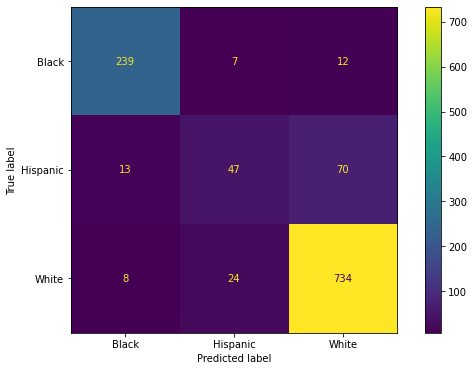

In [79]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test)

In [80]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[239   7  12]
 [ 13  47  70]
 [  8  24 734]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.92       258
    Hispanic       0.60      0.36      0.45       130
       White       0.90      0.96      0.93       766

    accuracy                           0.88      1154
   macro avg       0.81      0.75      0.77      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[ 958   17   65]
 [  53  223  273]
 [  35   80 2911]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92      1040
    Hispanic       0.70      0.41      0.51       549
       White       0.90      0.96      0.93      3026

    accuracy                           0.89      4615
   macro avg       0.84      0.76      0.79      4615
weighted avg       0.88      0.89      0.88      4615



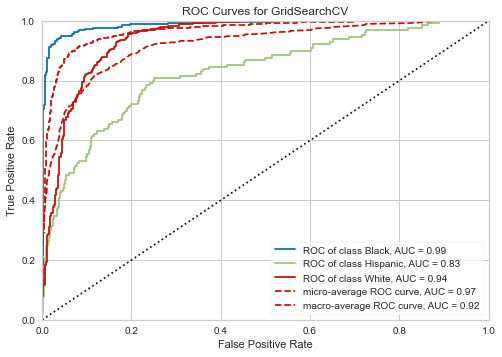

In [81]:
from yellowbrick.classifier import ROCAUC
model = grid_model
visualizer = ROCAUC(model)

visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();       

## 2. SVC

### Vanilla SVC model 

In [1]:
from sklearn.svm import SVC

In [83]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
eval_metric(svm_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[239   4  15]
 [ 13  27  90]
 [  9   7 750]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.92       258
    Hispanic       0.71      0.21      0.32       130
       White       0.88      0.98      0.93       766

    accuracy                           0.88      1154
   macro avg       0.83      0.70      0.72      1154
weighted avg       0.87      0.88      0.86      1154


Train_Set
[[ 967    6   67]
 [  47  170  332]
 [  18   14 2994]]
              precision    recall  f1-score   support

       Black       0.94      0.93      0.93      1040
    Hispanic       0.89      0.31      0.46       549
       White       0.88      0.99      0.93      3026

    accuracy                           0.90      4615
   macro avg       0.90      0.74      0.78      4615
weighted avg       0.90      0.90      0.88      4615



###  SVC Model GridsearchCV

In [84]:
svm = SVC(class_weight='balanced')
param_grid = {'C':[0.001,0.01,0.1],
              'kernel':['linear','rbf','sigmoid'],
              'gamma':["scale", "auto"]
              }
grid = GridSearchCV(svm,param_grid,scoring='accuracy')

In [ ]:
grid.fit(X,y)

In [ ]:
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
eval_metric(grid, X_train_scaled, y_train, X_test_scaled, y_test)

In [ ]:
plot_confusion_matrix(grid, X_test_scaled, y_test)

In [ ]:
from yellowbrick.classifier import ROCAUC
model = grid
visualizer = ROCAUC(model)

visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();   

## 3. RF

### Vanilla RF Model

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
RF_model=RandomForestClassifier()

In [49]:
RF_model.fit(X_train, y_train)
eval_metric(RF_model, X_train, y_train, X_test, y_test)

Test_Set
[[198   2  58]
 [ 10  11 109]
 [ 15   4 747]]
              precision    recall  f1-score   support

       Black       0.89      0.77      0.82       258
    Hispanic       0.65      0.08      0.15       130
       White       0.82      0.98      0.89       766

    accuracy                           0.83      1154
   macro avg       0.78      0.61      0.62      1154
weighted avg       0.81      0.83      0.79      1154


Train_Set
[[1040    0    0]
 [   0  549    0]
 [   0    0 3026]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1040
    Hispanic       1.00      1.00      1.00       549
       White       1.00      1.00      1.00      3026

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [50]:
eval_metric(RF_model, X_train, y_train, X_test, y_test)

Test_Set
[[198   2  58]
 [ 10  11 109]
 [ 15   4 747]]
              precision    recall  f1-score   support

       Black       0.89      0.77      0.82       258
    Hispanic       0.65      0.08      0.15       130
       White       0.82      0.98      0.89       766

    accuracy                           0.83      1154
   macro avg       0.78      0.61      0.62      1154
weighted avg       0.81      0.83      0.79      1154


Train_Set
[[1040    0    0]
 [   0  549    0]
 [   0    0 3026]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1040
    Hispanic       1.00      1.00      1.00       549
       White       1.00      1.00      1.00      3026

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### RF Model GridsearchCV

In [51]:
param_grid = {'n_estimators':[64, 128, 200],
             'max_features':[10, 20, "auto"],
             'max_depth':[2, 3, 4,5],
             'min_samples_split':[2, 3,4],
             'min_samples_leaf': [1,2,3,4],
             'max_samples':[0.5, 0.8]
             } 
model=RandomForestClassifier(class_weight='balanced')


In [52]:
rf_grid_model = GridSearchCV(model, param_grid=param_grid, scoring = "accuracy", n_jobs = -1)

In [47]:
rf_grid_model.fit(X_train,y_train)

## 4. XGBoost

### Vanilla XGBoost Model

In [51]:
import xgboost as xgb
from xgboost import XGBClassifier

In [61]:
xgb_model_1=XGBClassifier()

In [62]:
xgb_model_1.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [63]:
eval_metric(xgb_model_1, X_train, y_train, X_test, y_test)

Test_Set
[[212   5  41]
 [ 15  24  91]
 [ 16  14 736]]
              precision    recall  f1-score   support

       Black       0.87      0.82      0.85       258
    Hispanic       0.56      0.18      0.28       130
       White       0.85      0.96      0.90       766

    accuracy                           0.84      1154
   macro avg       0.76      0.66      0.67      1154
weighted avg       0.82      0.84      0.82      1154


Train_Set
[[ 926    4  110]
 [  38  188  323]
 [  20   17 2989]]
              precision    recall  f1-score   support

       Black       0.94      0.89      0.92      1040
    Hispanic       0.90      0.34      0.50       549
       White       0.87      0.99      0.93      3026

    accuracy                           0.89      4615
   macro avg       0.90      0.74      0.78      4615
weighted avg       0.89      0.89      0.87      4615



### XGBoost Model GridsearchCV

In [70]:
param_grid = {"n_estimators":[50, 100, 200],'max_depth':[3,4,5], "learning_rate": [0.1, 0.2],
             "subsample":[0.5, 0.8], "colsample_bytree":[0.5,0.6,0.7],'min_child_weight':range(1,6,2)}

In [71]:
xgb_model_2=XGBClassifier()

In [72]:
xgb_grid = GridSearchCV(xgb_model_2, param_grid, scoring = "f1", verbose=2, n_jobs = -1)

In [ ]:
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [87]:
xgb_grid_1=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=3,
                n_estimators=200,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
               random_state=0, reg_alpha=0)

In [88]:
xgb_grid_1.fit(X_train,y_train)

XGBClassifier(callbacks=None, colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, grow_policy='depthwise',
              interaction_constraints='', max_bin=256, max_cat_to_onehot=4,
              max_depth=4, max_leaves=0, min_child_weight=3, n_estimators=200,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob')

In [90]:
eval_metric(xgb_grid_1, X_train, y_train, X_test, y_test)

Test_Set
[[221   5  32]
 [ 19  26  85]
 [ 14  18 734]]
              precision    recall  f1-score   support

       Black       0.87      0.86      0.86       258
    Hispanic       0.53      0.20      0.29       130
       White       0.86      0.96      0.91       766

    accuracy                           0.85      1154
   macro avg       0.75      0.67      0.69      1154
weighted avg       0.83      0.85      0.83      1154


Train_Set
[[1024    1   15]
 [   6  468   75]
 [   3    1 3022]]
              precision    recall  f1-score   support

       Black       0.99      0.98      0.99      1040
    Hispanic       1.00      0.85      0.92       549
       White       0.97      1.00      0.98      3026

    accuracy                           0.98      4615
   macro avg       0.99      0.95      0.96      4615
weighted avg       0.98      0.98      0.98      4615



# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [ ]:
## best results come from the logistic model so we decided to use the logistic model.

In [55]:
model_log=LogisticRegression(class_weight='balanced',penalty='l2',C=0.26)


In [53]:
from sklearn.pipeline import Pipeline


In [74]:
operations = [('scaler',StandardScaler()),('logistic',model_log)]

In [75]:
final_model=Pipeline(steps=operations)

In [76]:
final_model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.26, class_weight='balanced'))])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___